In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1, "lines.markersize": 6,'figure.figsize':(11.7,8.27)})

In [2]:
data_path = '/users/krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
ls_obs_data = pd.read_csv(data_path+"combined_learning_sig_obs_data.csv")

In [3]:
ls_obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,599.0,0.670199,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,598.0,0.259707,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,599.0,0.740615,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,598.0,0.250242,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,599.0,0.700190,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135


In [4]:
ls_obs_data.columns

Index(['ID', 'experiment', 'condition', 'trial', 'shifted_epoch_trial',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'p_id_accuracy', 'rt',
       'lr_choice', 'lr_solution', 'cue_choice', 'high_p_cue', 'low_p_cue',
       'high_val_cue', 'low_val_cue', 'obs_accuracy', 'reward',
       'cumulative_reward', 'iti', 'total_trial_time', 'epoch_n',
       'epoch_trial', 'n_epoch_trials', 'prop_112', 'cpp', 'ideal_B',
       'target_B'],
      dtype='object')

In [5]:
lv_acc = ls_obs_data.loc[ls_obs_data.condition  == 'lv',[ 'p_id_accuracy', 'ID']]
hv_acc = ls_obs_data.loc[ls_obs_data.condition  == 'hv', ['p_id_accuracy', 'ID']]

In [6]:
lc_acc = ls_obs_data.loc[ls_obs_data.condition  == 'lc',[ 'p_id_accuracy', 'ID']]
hc_acc = ls_obs_data.loc[ls_obs_data.condition  == 'hc', ['p_id_accuracy', 'ID']]

In [9]:
lv_acc_mean=lv_acc.groupby('ID')['p_id_accuracy'].mean()
hv_acc_mean=hv_acc.groupby('ID')['p_id_accuracy'].mean()

lc_acc_mean=lc_acc.groupby('ID')['p_id_accuracy'].mean()
hc_acc_mean=hc_acc.groupby('ID')['p_id_accuracy'].mean()

In [8]:
# def plot_unity(xdata, ydata, **kwargs):
#     mn = min(xdata.min(), ydata.min())
#     mx = max(xdata.max(), ydata.max())
#     points = np.linspace(mn, mx, 100)
#     plt.gca().plot(points, points, color='k', marker=None,
#             linestyle='--', linewidth=1.0)

In [10]:
xlim = [0.25, 0.55]
ylim = xlim

ticks = np.arange(xlim[0], xlim[1], 0.05)

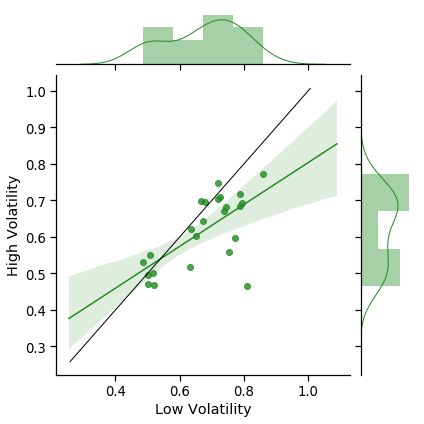

In [20]:
g = (sns.jointplot(x=lv_acc_mean, y=hv_acc_mean, kind="reg", color='forestgreen').set_axis_labels("Low Volatility", "High Volatility"))

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-k')   
# g.ax_joint.set_xticks(ticks)
# g.ax_joint.set_yticks(ticks)
# plt.savefig("volatility_accs.pdf", dpi=600)

# g.x = lv_acc.p_id_accuracy
# g.y = hv_acc.p_id_accuracy
# g.plot_joint(plt.scatter, marker='x', c='b', s=50)
plt.savefig("volatility_acc.pdf", dpi=600)


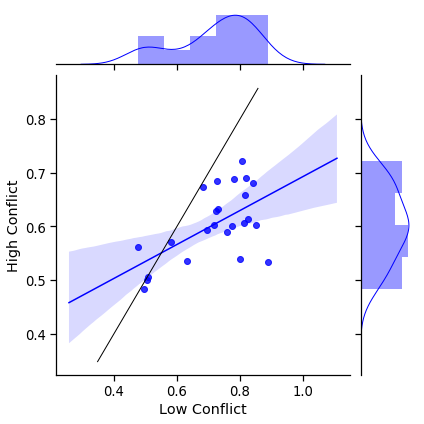

In [23]:
g = (sns.jointplot(x=lc_acc_mean, y=hc_acc_mean, kind="reg", color = 'blue').set_axis_labels("Low Conflict", "High Conflict"))

x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, '-k')   

# g.ax_joint.set_xticks(ticks)
# g.ax_joint.set_yticks(ticks)

# plt.savefig("conflict_accs.pdf", dpi=600)